In [ ]:
filename = 'GoogleEarth_KML/Bodium_Vineyard.kml'

In [29]:
import folium as f 
import kml_parser_functs as kml
import map_functs as mf 
import math 

In [3]:


name,lookat, features = kml.parse_KML(filename)


print(name)


Bodium_Vineyard


In [4]:
# Render Map
#m = f.Map(location=[51.05531670367141, 0.5354980472325033], zoom_start=15)

#m = mf.generatemap(lookat[0])

#mf.plot_features(features,m)
#m

In [5]:
for i in features:
    print(i.Type)
    print(i.limits)
    
    print()

polygon
[[51.00373157396675, 0.5432519630088373], [51.00566075395709, 0.5475393292600583]]

polygon
[[51.00340933960138, 0.5416669906184834], [51.00514842606961, 0.5439256521018088]]

polygon
[[51.00266683029383, 0.5443321400104018], [51.00463863232355, 0.5487992708769962]]

polygon
[[51.00340049475254, 0.5471587780880038], [51.00621747942344, 0.5513059029481848]]

polygon
[[51.00358906362068, 0.550504974875361], [51.00607165932743, 0.5566288705456635]]

Point
(51.00582142592069, 0.5505494133909883)

LineString
[[51.00467093483719, 0.5480129235940878], [51.00497530379979, 0.5506149760155776]]

LineString
[[51.00257868796057, 0.5452863199584557], [51.00358002466746, 0.5567734236427557]]

polygon
[[51.00183431188619, 0.5479136550233843], [51.00284979948304, 0.5497842449350521]]

Point
(51.00154269913671, 0.5412234795859439)

Point
(51.00690494514861, 0.557478650672889)



In [11]:
test = features[0].limits
test

[[51.00373157396675, 0.5432519630088373],
 [51.00566075395709, 0.5475393292600583]]

In [42]:
feature = features[0]
feature.crop_bearing = 45

In [43]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [44]:
def calc_matrix(obj):
    
    opx = [obj.limits[0][0]]
    opy = [obj.limits[0][1]]
    
    stepX = (obj.limits[1][0] - obj.limits[0][0])/obj.matrix_res
    stepY = (obj.limits[1][1] - obj.limits[0][1])/obj.matrix_res

    for x in range(1,obj.matrix_res-1):
        opx.append(obj.limits[0][0]+(stepX*x))
    
    for y in range(1,obj.matrix_res-1):
        opy.append(obj.limits[0][1]+(stepY*y))

    opx.append(obj.limits[1][0])
    opy.append(obj.limits[1][1])
    
    matrix = []
    for x in opx:
        for y in opy:
            matrix.append([x,y])
    
    
    matrix_rotated = []
    
    for point in matrix:
        matrix_rotated.append(rotate(obj.midpoint,point, math.radians(obj.crop_bearing)))
        
    
    
    return matrix, matrix_rotated 
    
    
m,mr = calc_matrix(feature) 

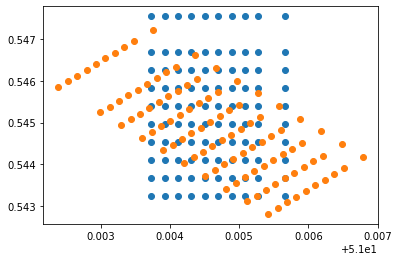

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#day one, the age and speed of 13 cars:

x = []
y = []
for p in m: 
    x.append(p[0])
    y.append(p[1])

    
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)

x = []
y = []
for p in mr: 
    x.append(p[0])
    y.append(p[1])

    
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)

#day two, the age and speed of 15 cars:
#x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
#y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
#plt.scatter(x, y)

plt.show()